In [1]:
include("../speciale_tools.jl")
import JLD
import PyPlot
#figure_folder = "/home/data/simon/result/figures_repport"
figure_folder = "/Users/simon/Documents/DTU fag/Speciale/Figures_repport"

"/Users/simon/Documents/DTU fag/Speciale/Figures_repport"

In [2]:
function histogram(data,n_bins)
    h = StatsBase.fit(StatsBase.Histogram, data,nbins=n_bins)
    w = h.weights
    edges = collect(h.edges[1])
    y = (edges[2:end] +  edges[1:end-1])/2;
    return y, w
end

histogram (generic function with 1 method)

In [3]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/vejle_new"


"/Users/simon/Documents/DTU fag/Speciale/vejle_new"

In [4]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);
VV = _load_jld(VV_files,data_folder);
VH = _load_jld(VH_files,data_folder);
VV = [elem[:,end:-1:1] for elem in VV];
VH = [elem[:,end:-1:1] for elem in VH];

# subset 

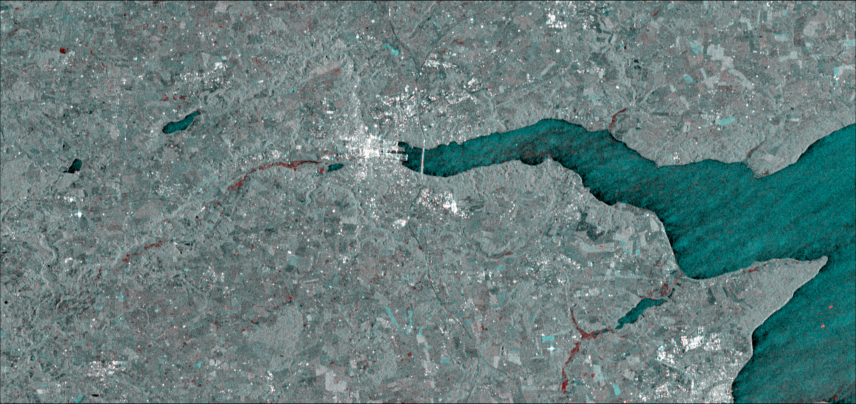

In [23]:
img = pretty_img([VV[1],VV[4]],min_vv,max_vv)

In [24]:
size(img)

(806, 1711)

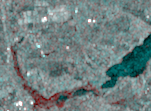

In [25]:
subset = [570:680,1130:1280]
img[subset...]

# Filter pre 

In [8]:
VV_pre_filt = SlcUtil.temporal_filter(VV[2:end],5);

In [9]:
i = 4

4

In [10]:
pre_raw = VV[i+1][subset...];
pre_filt=VV_pre_filt[i][subset...];

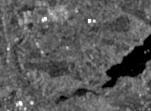

In [12]:
img = Colors.Gray.(db_scale_img(pre_raw,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_no_temporal_pre.png")
FileIO.save(file_path,img)
img

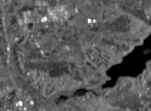

In [13]:
img = Colors.Gray.(db_scale_img(pre_filt,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_temporal_pre.png")
FileIO.save(file_path,img)
img

In [14]:
y_raw, w_raw = histogram(10 .* log10.(reshape(pre_raw,:)),100);
y_filt, w_filt = histogram(10 .* log10.(reshape(pre_filt,:)),100);

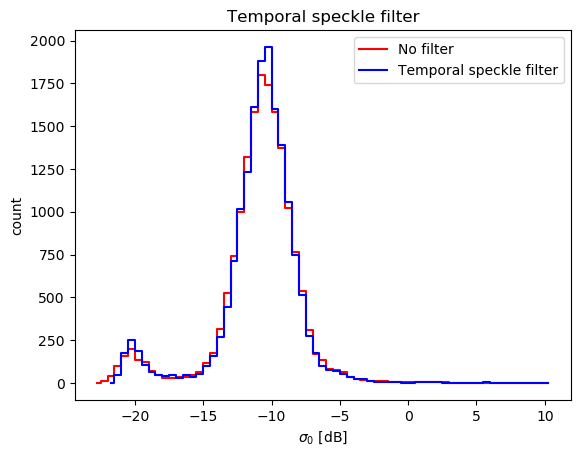

In [25]:

file_path = joinpath(figure_folder,"hist_temporal_pre.png")
PyPlot.figure()
PyPlot.step(y_raw, w_raw,color="r",where="mid")
PyPlot.step(y_filt, w_filt,color="b",where="mid")
PyPlot.legend(["No filter","Temporal speckle filter"])
PyPlot.title("Temporal speckle filter")
PyPlot.xlabel("\$\\sigma_0 \$ [dB]")
PyPlot.ylabel("count")
PyPlot.savefig(file_path)

# Filter co VV and VH


In [27]:
VV_co_filt,VH_co_filt = SlcUtil.temporal_filter([VV[1],VH[1]],5);
VV_co_all = SlcUtil.temporal_filter(VV,5);
VV_co_all = VV_co_all[1];

In [28]:
co_raw = VV[1][subset...]
co_filt = VV_co_filt[subset...];
co_all = VV_co_all[subset...];

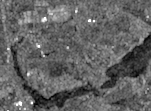

In [29]:
img = Colors.Gray.(db_scale_img(co_raw,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_no_temporal_co.png")
FileIO.save(file_path,img)
img

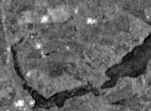

In [30]:
img = Colors.Gray.(db_scale_img(co_filt,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_pols_temporal_co.png")
FileIO.save(file_path,img)
img

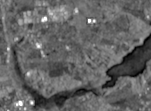

In [31]:
img= Colors.Gray.(db_scale_img(co_all,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_all_temporal_co.png")
FileIO.save(file_path,img)
img

In [32]:
y_raw, w_raw = histogram(10 .* log10.(reshape(co_raw,:)),100);
y_filt, w_filt = histogram(10 .* log10.(reshape(co_filt,:)),100);
y_all, w_all = histogram(10 .* log10.(reshape(co_all,:)),100);

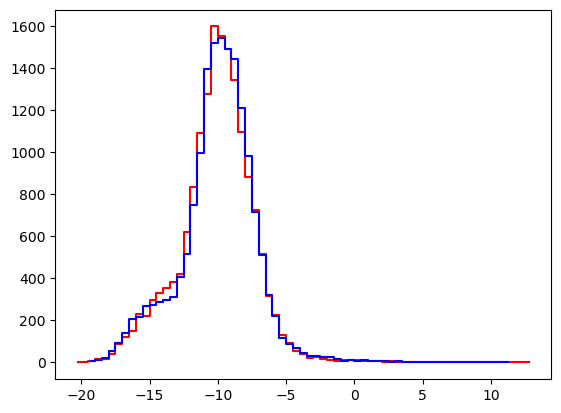

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14ea4ca58>

In [33]:
# Histo gram of go pol

PyPlot.figure()
PyPlot.step(y_raw, w_raw,color="r",where="mid")
PyPlot.step(y_filt, w_filt,color="b",where="mid")